In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import geopandas as gpd

In [56]:
df_csv = pd.read_csv('rm_crop_yields_1938_2021.csv')

In [57]:
gdf = gpd.read_file('Rural Municipality.shp')

gdf['RMNO']=gdf['RMNO'].astype('int')
gdf['RMNM']=gdf['RMNM'].astype('string')

gdf.rename(columns=
{
    'RMNO': 'RM',
    'RMNM': 'Municipality'
}, inplace=True)


In [58]:
df_csv.describe()
# Year from 1938 to 2021 ~ 84 years
# Spring Wheat, Oats and Barley have the most rows -> more complete data?
# Chickpeas, Lentils has the most mean -> most yield
# Tame Hay, Spring Rye, Flax have the least mean -> least yield

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
count,25017.000000,25017.000000,3037.00000,14008.000000,24924.000000,4487.000000,11581.000000,946.000000,23913.000000,5515.000000,8134.000000,24703.000000,15847.000000,3819.000000,805.000000,4205.000000,20934.000000,960.000000
mean,1979.385938,248.957509,38.24350,24.146796,25.778733,844.185955,29.024429,692.629915,47.104433,1171.778849,30.971982,38.022104,21.225298,995.140223,7.575776,1.181520,14.287663,1408.060594
std,24.221744,148.829628,12.20715,9.209177,11.153028,275.700375,9.829962,555.776604,21.775369,408.937628,10.223101,16.610425,10.101176,354.208181,12.473814,0.654725,7.082308,579.635067
min,1938.000000,1.000000,3.00000,0.000000,0.000000,35.600000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,31.000000
25%,1958.000000,124.000000,30.00000,18.000000,19.000000,663.500000,23.000000,0.000000,33.000000,900.000000,24.300000,26.000000,15.000000,757.000000,0.000000,0.750000,9.000000,1000.000000
50%,1979.000000,247.000000,38.00000,23.000000,25.600000,847.000000,28.200000,790.500000,46.000000,1166.000000,31.000000,37.900000,20.000000,1000.000000,0.000000,1.200000,14.000000,1376.500000
75%,2000.000000,370.000000,45.50000,29.200000,31.800000,1000.945000,34.300000,1100.000000,59.000000,1439.000000,37.900000,48.750000,26.300000,1200.000000,20.000000,1.570000,19.200000,1782.250000
max,2021.000000,622.000000,90.00000,59.500000,198.000000,2500.000000,85.370000,2400.000000,165.100000,3411.000000,86.800000,105.940000,108.000000,2727.000000,46.500000,4.000000,110.000000,5400.000000


In [60]:
df_csv.groupby('RM').mean().sort_values('Spring Wheat',ascending=False)

#RM429 has highest Spring Wheat yield

,Year,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
RM,,,,,,,,,,,,,,,,,
429,1979.5,46.682500,27.386000,33.299643,1715.000000,31.664706,0.0,63.272169,1147.166667,31.976667,45.956548,27.711429,1138.676923,0.000000,1.390714,16.638611,NaN
333,1979.5,49.260000,26.209818,32.889881,1043.000000,27.434783,0.0,57.963418,1000.000000,40.144444,46.063214,19.392308,1997.690000,0.000000,1.940000,16.142742,NaN
428,1979.5,40.314444,26.927636,32.717381,855.000000,29.678571,0.0,63.471190,1047.500000,32.320000,45.381786,25.338636,1274.409048,0.000000,1.207333,16.897792,NaN
271,1979.5,45.076190,27.386182,32.582976,1137.428571,31.317241,500.0,58.514167,800.000000,40.952000,45.870000,21.382353,951.981667,0.000000,1.740667,16.432027,NaN
427,1979.5,41.600000,26.256545,32.517143,737.333333,28.621429,299.5,63.277024,827.240000,34.763333,44.892381,24.894643,1116.905000,11.666667,1.254000,17.354405,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1979.5,39.672857,25.056667,18.628101,787.197222,25.335962,370.0,36.276625,1125.636667,27.458333,28.494521,17.962750,500.000000,0.000000,1.165385,10.968718,1714.444444
51,1979.5,30.205556,17.267308,18.319405,668.987308,23.654038,527.4,35.865769,871.324211,27.176190,28.426386,17.038596,886.995417,0.000000,1.128000,8.954054,1314.746429
10,1979.5,30.713333,20.182593,18.130617,724.233333,24.337885,200.0,33.550000,1052.614074,24.428000,28.328701,15.510870,748.825000,15.500000,1.041429,9.431429,1291.691176


## Forecast for RM429, Spring Wheat

In [62]:
df_RM_SpringWheat =df_csv.loc[df_csv['RM']==429][['Year', 'Spring Wheat']]

In [63]:
df_RM_SpringWheat['Year'] = pd.to_datetime(df_RM_SpringWheat['Year'], format='%Y')
df_RM_SpringWheat = df_RM_SpringWheat.set_index('Year')

<function matplotlib.pyplot.show(close=None, block=None)>

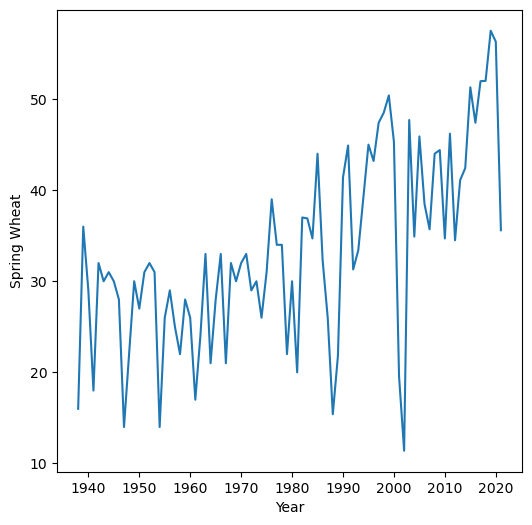

In [64]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(df_RM_SpringWheat['Spring Wheat'])
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')

#fig.autofmt_xdate()
#plt.tight_layout()
plt.show

## Predict using the last observation

In [65]:
df = df_RM_SpringWheat.copy()

df['y'] = df['Spring Wheat'].shift(-1)
df

,Spring Wheat,y
Year,,
1938-01-01,16.00,36.0
1939-01-01,36.00,29.0
1940-01-01,29.00,18.0
1941-01-01,18.00,32.0
1942-01-01,32.00,30.0
...,...,...
2017-01-01,51.96,52.0
2018-01-01,52.00,57.5
2019-01-01,57.50,56.3


## Train and Test Data Set

In [66]:
train = df[:-20]
test = df[-20:]

print(f'Shape of training set: {train.shape}')
print(f'Shape of test set: {test.shape}')

Shape of training set: (64, 2)
Shape of test set: (20, 2)


In [67]:
test = test.copy()
test['baseline_pred'] = test['Spring Wheat']

#test = test.drop(test.tail(1).index) # Drop last row

test

,Spring Wheat,y,baseline_pred
Year,,,
2002-01-01,11.40,47.70,11.40
2003-01-01,47.70,34.90,47.70
2004-01-01,34.90,45.90,34.90
2005-01-01,45.90,38.50,45.90
2006-01-01,38.50,35.70,38.50
2007-01-01,35.70,44.00,35.70
2008-01-01,44.00,44.40,44.00
2009-01-01,44.40,34.70,44.40
2010-01-01,34.70,46.20,34.70


In [68]:

X_train = train['Spring Wheat'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Spring Wheat'].values.reshape(-1,1)


## Applying Model

In [69]:
from sklearn.tree import DecisionTreeRegressor


# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=25)

# Fit the model
dt_reg.fit(X=X_train, y=y_train)

# Make predictions
dt_pred = dt_reg.predict(X_test)

# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=25)

gbr.fit(X_train, y_train.ravel())

gbr_pred = gbr.predict(X_test)

test['gbr_pred'] = gbr_pred


In [71]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['y'], test['gbr_pred'])

print(f'Baseline: {baseline_mape}%')
print(f'Decision Tree: {dt_mape}%')
print(f'Gradient Boosting Regressor: {gbr_mape}%')

Baseline: 20.72%
Decision Tree: 19.75%
Gradient Boosting Regressor: 18.91%


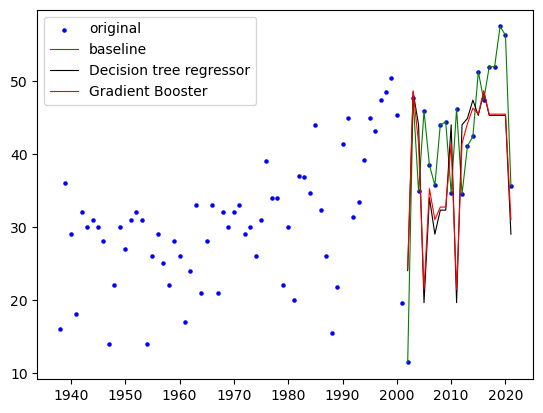

In [72]:
x_ax = range(len(train))
plt.scatter(df_RM_SpringWheat.index,df_RM_SpringWheat['Spring Wheat'], s=5, color="blue", label="original")
plt.plot(test.index,test['baseline_pred'], lw=0.8, color="green", label="baseline")
plt.plot(test.index,test['dt_pred'], lw=0.8, color="black", label="Decision tree regressor")
plt.plot(test.index,test['gbr_pred'], lw=0.8, color="red", label="Gradient Booster")

plt.legend()
plt.show()

## Predict the next step with a window as input

In [73]:
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Spring Wheat'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['Spring Wheat'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [74]:
new_df = window_input(5, df_RM_SpringWheat)
new_df

,Spring Wheat,x_1,x_2,x_3,x_4,y
Year,,,,,,
1938-01-01,16.00,36.00,29.00,18.00,32.00,30.00
1939-01-01,36.00,29.00,18.00,32.00,30.00,31.00
1940-01-01,29.00,18.00,32.00,30.00,31.00,30.00
1941-01-01,18.00,32.00,30.00,31.00,30.00,28.00
1942-01-01,32.00,30.00,31.00,30.00,28.00,14.00
...,...,...,...,...,...,...
2012-01-01,34.50,41.10,42.42,51.29,47.40,51.96
2013-01-01,41.10,42.42,51.29,47.40,51.96,52.00
2014-01-01,42.42,51.29,47.40,51.96,52.00,57.50


In [75]:
from sklearn.model_selection import train_test_split

X = new_df[['Spring Wheat', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, shuffle=False)

In [76]:
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

In [77]:
dt_reg_5 = DecisionTreeRegressor(random_state=25)

dt_reg_5.fit(X_train, y_train)

dt_reg_5_pred = dt_reg_5.predict(X_test)

In [78]:
gbr_5 = GradientBoostingRegressor(random_state=25)

gbr_5.fit(X_train, y_train.ravel())

gbr_5_pred = gbr_5.predict(X_test)

In [79]:
baseline_mape = mape(y_test, baseline_pred)
dt_5_mape = mape(y_test, dt_reg_5_pred)
gbr_5_mape = mape(y_test, gbr_5_pred)

print(f'Baseline MAPE: {baseline_mape}%')
print(f'Decision Tree MAPE: {dt_5_mape}%')
print(f'Gradient Boosting MAPE: {gbr_5_mape}%')

Baseline MAPE: 30.04%
Decision Tree MAPE: 27.46%
Gradient Boosting MAPE: 24.26%


###### *** Gradient Boosting Regression is the better forecasting model for the above dataset.

## Clustering Canola for 10 years of data

In [80]:
new_df = df_csv[df_csv['Year']>=2012]
new_df.reset_index(inplace=True)
new_df

,index,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,74,2012,1,54.00,22.30,36.20,NaN,NaN,NaN,54.70,NaN,29.0,53.80,51.80,NaN,NaN,NaN,18.00,NaN
1,75,2013,1,47.10,32.10,47.40,1125.00,NaN,NaN,58.70,NaN,38.2,73.70,NaN,NaN,NaN,NaN,30.20,NaN
2,76,2014,1,43.30,26.21,NaN,476.02,NaN,0.0,59.69,NaN,36.8,52.08,39.23,NaN,0.0,0.0,18.23,NaN
3,77,2015,1,47.48,28.65,34.32,NaN,29.18,NaN,56.36,NaN,37.7,50.96,41.64,NaN,NaN,NaN,16.07,NaN
4,78,2016,1,60.60,32.10,40.50,169.00,38.40,NaN,75.70,728.0,26.2,68.10,58.50,NaN,NaN,NaN,24.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2946,25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.00,NaN,NaN,NaN,NaN,NaN,NaN
2947,25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.90,NaN,NaN,NaN,NaN,NaN,NaN
2948,25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.30,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#RM with null values
#temp = pd.DataFrame(new_df[new_df['Canola'].isna()].RM.unique())

In [81]:
new_df = new_df.dropna(axis=0, subset=['Canola'])

In [82]:
new_df['Canola'].isna().sum()

0

In [117]:
#check dropped RM still in data
#new_temp = temp[~temp[0].isin(new_df['RM'].unique())]
#temp[0].isin(new_df['RM'].unique())


In [83]:
df_mean=new_df.groupby(['RM'])['Canola'].mean()\
    .to_frame()

In [84]:
df_std=new_df.groupby(['RM'])['Canola'].std()\
    .to_frame()

In [85]:
new_df.groupby('RM')['Year'].count()\
    .to_frame()\
        .sort_values('Year')

,Year
RM,
279,2
110,3
46,4
18,4
470,5
...,...
161,10
160,10
159,10


In [86]:
df_mean.reset_index(inplace=True)
df_std.reset_index(inplace=True)

In [87]:
df_ms=pd.merge(
    df_mean.rename(columns={'Canola': 'MeanYield'}),
    df_std.rename(columns={'Canola': 'StdYield'}),
    on='RM'
)

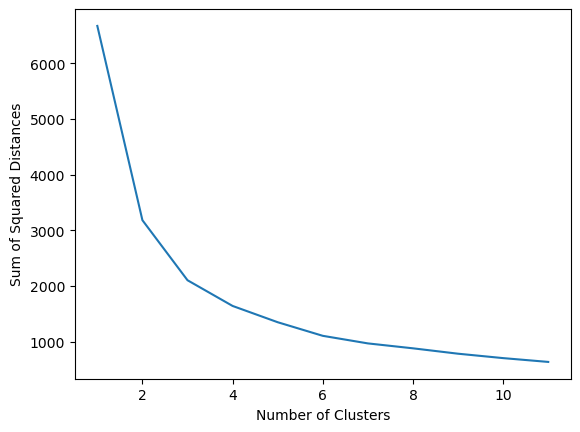

In [88]:
from sklearn.cluster import KMeans

# Define the features to be used for clustering
X = df_ms[['MeanYield', 'StdYield']]

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
# Plot the elbow graph
plt.plot(range(1, 12), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

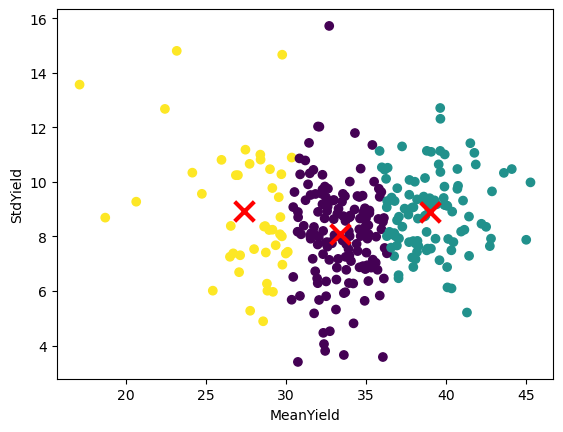

In [89]:
# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X['MeanYield'], X['StdYield'], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('MeanYield')
plt.ylabel('StdYield')
plt.show()

In [90]:
df_ms['Labels']=labels

In [91]:
df_ms.groupby('Labels').mean()\
    .sort_values('MeanYield')

,RM,MeanYield,StdYield
Labels,,,
2,95.750000,27.369614,8.937103
0,224.006757,33.402761,8.088466
1,345.504854,39.023019,8.889548


In [92]:
df_ms.replace(to_replace={
    0:1,
    1:0}, inplace=True
)

In [ ]:
pd.merge(
    gdf[['RM', 'geometry']],
    df_ms,
    on='RM'
    ).explore(
        column='Labels', # column you want to visualize
        cmap='YlGn', # color on the map
        k=3, # number of colors. We have 3 clusters
        scheme='naturalbreaks', #How your legened will look like
        tiles='Stamen Terrain', # map background type
        tooltip=['RM', 'MeanYield', 'Labels'] # what to show when you hover around your mouse
    )

#### *** Canola has the most yield in the northern region of province.